# Problem conversion

Moving from raw problem instance data to MCAPRTIF via pytables.

In [443]:
%load_ext autoreload
%autoreload 2

# Show all code cells outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import logging
logging.basicConfig(level=logging.INFO)

import os
import sys
sys.path.insert(0, os.path.abspath('../../'))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import numpy as np

In [3]:
from osmnx_network_extract.extract_mcarptif import NetworkExtract

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [4]:
network_file = '../../../hobbes_projects/wasted_large_instances/outputs/city_punggol_full_internal_50m_buffer.h5'
test_network = pd.read_csv('../../../hobbes_projects/wasted_large_instances/outputs/city_punggol_full_internal_50m_buffer_original_dataframe.csv')
test_network = test_network.drop(columns=['Unnamed: 0'])

/Users/ejwillemse/opt/anaconda3/envs/waste_labs_examples/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (14,17,19,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [239]:
test_size = 1000

sample = np.random.randint(0, test_network.shape[0], size=test_size)
sample = np.unique(sample)
req_arcs = test_network.iloc[sample, :].copy()
req_arcs = req_arcs.sort_values(['arc_index'])
req_arcs = req_arcs.drop_duplicates(['arc_id_ordered'])
req_arcs = req_arcs.dropna(subset=['geometry'])
req_arcs['geometry'] = req_arcs['geometry'].apply(wkt.loads)
req_arcs = gpd.GeoDataFrame(req_arcs, geometry=req_arcs['geometry'], crs='EPSG:4326')

_ = req_arcs.plot(figsize=(10, 10), linewidth=2.5)

In [240]:
test_network.duplicated(['arc_index']).any()

False

## Network testing starts here

In [243]:
network_info = NetworkExtract(test_network, network_file)

depot = req_arcs['arc_index'].iloc[0]
ifs = req_arcs['arc_index'].iloc[-4:]

network_info.load_required_arcs(req_arcs)
network_info.set_depot_arc(depot)
network_info.set_if_arcs(ifs)
network_info.loc_in_required_arcs()
network_info.extend_required_inverse_arcs()
network_info.load_distance_matrix()
network_info.offload_calculations()

In [244]:
network_info.set_travel_speed(10000)
network_info.set_offload_time(10000)
network_info.update_cost_matrix()
network_info.update_offload_cost()

INFO:root:Update travel durations.
INFO:root:Update offload durations.


In [245]:
network_info.reqArcList

array([   27, 33309, 33322, ..., 33029, 33028, 33058])

In [246]:
network_info.reqArcListActual

array([   5,    6,    7, ..., 1359, 1360, 1361])

In [247]:
network_info.reqEdgesPure

array([ 11,  17,  19,  22,  27,  30,  31,  49,  50,  53,  67,  88,  98,
        99, 119, 131, 134, 135, 147, 151, 171, 175, 180, 194, 196, 226,
       233, 234, 236, 238, 242, 244, 256, 276, 278, 279, 280, 283, 284,
       285, 286, 289, 290, 291, 296, 297, 298, 301, 304, 305, 307, 308,
       310, 311, 312, 314, 317, 318, 319, 321, 322, 323, 324, 326, 327,
       332, 333, 336, 339, 340, 341, 342, 343, 344, 345, 346, 347, 352,
       353, 356, 357, 358, 359, 360, 363, 365, 366, 367, 368, 370, 372,
       373, 374, 375, 378, 379, 381, 382, 383, 384, 385, 386, 387, 390,
       391, 393, 395, 396, 397, 398, 399, 402, 404, 405, 408, 412, 413,
       417, 418, 419, 420, 421, 422, 423, 425, 426, 427, 428, 430, 431,
       432, 433, 435, 436, 437, 438, 440, 443, 444, 445, 446, 449, 451,
       452, 453, 456, 457, 458, 459, 461, 462, 463, 465, 469, 470, 471,
       473, 474, 475, 480, 485, 486, 487, 494, 496, 497, 503, 507, 508,
       510, 511, 513, 515, 517, 518, 519, 521, 522, 523, 524, 52

In [248]:
network_info.reqArcsPure

array([  5,   6,   7,   8,   9,  10,  12,  13,  14,  15,  16,  18,  20,
        21,  23,  24,  25,  26,  28,  29,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  51,  52,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  89,  90,  91,  92,  93,  94,
        95,  96,  97, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 120, 121, 122, 123,
       124, 125, 126, 127, 128, 129, 130, 132, 133, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 148, 149, 150, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 172, 173, 174, 176, 177, 178, 179, 181, 182, 183,
       184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 195, 197, 198,
       199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 21

In [249]:
network_info.reqInvArcList

array([None, None, None, ..., 918.0, 919.0, 921.0], dtype=object)

In [250]:
network_info.req_inv_list_full

,arc_index,arc_index_inv,req_arc_index,req_arc_index_inv
0,27,None,0,None
1,33309,None,1,None
2,33322,None,2,None
3,33335,None,3,None
4,33338,None,4,None
...,...,...,...,...
1357,32881,32879,1357,915
1358,32929,32931,1358,916
1359,33029,33027,1359,918
1360,33028,33030,1360,919


In [251]:
network_info.main_arc_list

,arc_index,arc_index_inv,req_arc_index,req_arc_index_inv,arc_category
0,27,-1,0,-1,depot
1,33309,-1,1,-1,offload
2,33322,-1,2,-1,offload
3,33335,-1,3,-1,offload
4,33338,-1,4,-1,offload
...,...,...,...,...,...
1357,32881,32879,1357,915,required_edge_inverse
1358,32929,32931,1358,916,required_edge_inverse
1359,33029,33027,1359,918,required_edge_inverse
1360,33028,33030,1360,919,required_edge_inverse


In [252]:
network_info.d_np_req

array([[0.    , 2.4074, 2.2693, ..., 2.4529, 2.4373, 2.3542],
       [2.4009, 0.    , 0.8212, ..., 0.8141, 0.7985, 0.2191],
       [2.4063, 0.8164, 0.    , ..., 0.3215, 0.3059, 0.6791],
       ...,
       [2.5821, 0.8134, 0.3261, ..., 0.    , 0.    , 0.6769],
       [2.5665, 0.829 , 0.3105, ..., 0.    , 0.    , 0.6925],
       [2.4514, 0.2411, 0.6535, ..., 0.6464, 0.6308, 0.    ]])

In [253]:
network_info.if_cost_np

array([[10000.    , 10002.4074, 10002.2693, ..., 10002.4529, 10002.4373,
        10002.3542],
       [10002.4009, 10000.    , 10000.8212, ..., 10000.8141, 10000.7985,
        10000.2191],
       [10002.4063, 10000.8164, 10000.    , ..., 10000.3215, 10000.3059,
        10000.6791],
       ...,
       [10002.6993, 10000.8134, 10000.3261, ..., 10000.3679, 10000.3523,
        10000.8514],
       [10002.6837, 10000.829 , 10000.3105, ..., 10000.3523, 10000.3367,
        10000.8358],
       [10002.5636, 10000.2411, 10000.6535, ..., 10000.7601, 10000.7445,
        10000.4602]])

In [254]:
network_info.if_arc_np

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [2, 1, 2, ..., 2, 2, 2],
       ...,
       [4, 1, 2, ..., 4, 4, 4],
       [4, 1, 2, ..., 4, 4, 4],
       [3, 1, 2, ..., 4, 4, 1]])

In [255]:
service_speed = 1 / 3.6 # (m/s)
service_costs = req_arcs[['arc_index', 'length']].copy()
service_costs['service_cost'] = service_costs[['length']] / service_speed

In [256]:
network_info.set_service_cost(service_costs)

INFO:root:Setting service cost for network


In [284]:
network_info.df_service_cost

,arc_index,arc_index_inv,req_arc_index,req_arc_index_inv,arc_category,length,service_cost,service_cost_inv
0,27,-1,0,-1,depot,6.713,0.0000,NaN
1,33309,-1,1,-1,offload,125.456,0.0000,NaN
2,33322,-1,2,-1,offload,30.508,0.0000,NaN
3,33335,-1,3,-1,offload,27.347,0.0000,NaN
4,33338,-1,4,-1,offload,32.262,0.0000,NaN
...,...,...,...,...,...,...,...,...
1357,32881,32879,1357,915,required_edge_inverse,NaN,124.7184,124.7184
1358,32929,32931,1358,916,required_edge_inverse,NaN,1035.0036,1035.0036
1359,33029,33027,1359,918,required_edge_inverse,NaN,1344.1788,1344.1788
1360,33028,33030,1360,919,required_edge_inverse,NaN,562.5900,562.5900


In [292]:
demand = 1 # unit
df_demand = req_arcs[['arc_index']].copy()
df_demand['demand'] = 1

network_info.set_service_demand(df_demand)

network_info.set_travel_speed(30 / 3.6)
network_info.set_offload_time(15 * 60)
network_info.update_cost_matrix()
network_info.update_offload_cost()

network_info.d_np_req.mean()
network_info.if_cost_np.mean()

network_info.check_shapes()

network_info.round_key_inputs()

network_info.calc_min_duration_capacity()

In [306]:
service_speed = 1 #1 / 3.6 # (m/s)
service_costs = req_arcs[['arc_index', 'length']].copy()
service_costs['service_cost'] = service_costs[['length']] * 0/ service_speed

network_info.set_travel_speed(60 / 3.6)
network_info.set_offload_time(0)
network_info.update_cost_matrix()
network_info.update_offload_cost()
network_info.set_service_cost(service_costs)

INFO:root:Update travel durations.
INFO:root:Update offload durations.
INFO:root:Setting service cost for network


In [307]:
network_info.calc_min_duration_capacity()
network_info.min_duration
network_info.min_capacity

6101.28

1

In [308]:
6101.28 / 3600

1.6947999999999999

## Offload calculation test

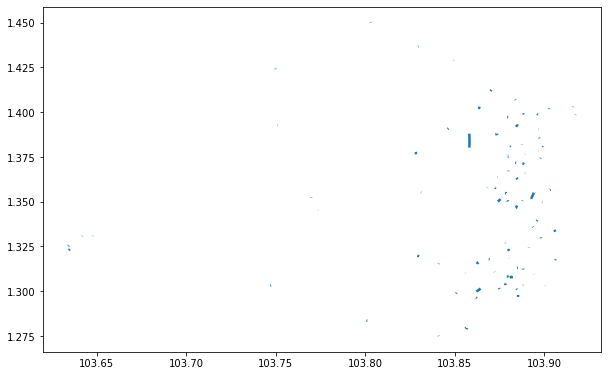

In [431]:
test_size = 100

sample = np.random.randint(0, test_network.shape[0], size=test_size)
sample = np.unique(sample)
req_arcs = test_network.iloc[sample, :].copy()
req_arcs = req_arcs.sort_values(['arc_index'])
req_arcs = req_arcs.drop_duplicates(['arc_id_ordered'])
req_arcs = req_arcs.dropna(subset=['geometry'])
req_arcs['geometry'] = req_arcs['geometry'].apply(wkt.loads)
req_arcs = gpd.GeoDataFrame(req_arcs, geometry=req_arcs['geometry'], crs='EPSG:4326')

_ = req_arcs.plot(figsize=(10, 10), linewidth=2.5)

In [435]:
%%time
network_info = NetworkExtract(test_network, network_file)

depot = req_arcs['arc_index'].iloc[0]
ifs = req_arcs['arc_index'].iloc[-4:]

network_info.load_required_arcs(req_arcs)
network_info.set_depot_arc(depot)
network_info.set_if_arcs(ifs)
network_info.loc_in_required_arcs()
network_info.extend_required_inverse_arcs()
network_info.load_distance_matrix()

network_info.offload_calculations()
if2_cost_comp = network_info.if_cost_np.copy()
if2_arc_comp = network_info.if_arc_np.copy()

network_info.offload_calculations3D()
if_cost_comp = network_info.if_cost_np.copy()
if_arc_comp = network_info.if_arc_np.copy()

INFO:root:Creating inverse arc list
INFO:root:Number of edges: 19170
INFO:root:Edges with inverse pairs: 17799
INFO:root:Number of arcs: 17794
INFO:root:Load required arcs
INFO:root:Set depot
INFO:root:Set offload facilities
INFO:root:Extend required arcs with inverse edge arcs
INFO:root:Load distance matrix: 138 x 138
INFO:root:Creating nearest neighbour lists
INFO:root:Calculate offloads: 138 x 138 x 4
INFO:root:Calculate offloads: 138 x 138 x 4


CPU times: user 1.03 s, sys: 50.1 ms, total: 1.08 s
Wall time: 1.07 s


In [436]:
np.array_equiv(if2_arc_comp[1:,:], if2_arc_comp[1:,:],)

True

In [437]:
if_cost_comp
if2_cost_comp

array([[    0, 38026, 31208, ..., 34464, 33590, 32685],
       [38295,     0,  8272, ...,  7642,  6836,  7804],
       [31033,  6804,     0, ...,  7637,  2948,  2372],
       ...,
       [38910,  7506,  7877, ..., 11076, 10825, 10249],
       [34316,  6172,  3283, ..., 10920,  6231,  5655],
       [33204,  7099,  2171, ...,  9808,  5119,  4543]], dtype=int32)

array([[    0., 38012., 31208., ..., 34464., 33590., 32685.],
       [38295.,     0.,  8272., ...,  7642.,  6836.,  7804.],
       [31033.,  6804.,     0., ...,  7637.,  2948.,  2372.],
       ...,
       [38910.,  7506.,  7877., ..., 11076., 10825., 10249.],
       [34316.,  6172.,  3283., ..., 10920.,  6231.,  5655.],
       [33204.,  7099.,  2171., ...,  9808.,  5119.,  4543.]])

In [438]:
d = network_info.d_np_req
arc_to_if = d[:, 1]
if_to_arc = d[1, :]

dist1, dist2 = np.meshgrid(arc_to_if, if_to_arc)

dist = dist1 + dist2
dist = dist.T

n_arcs = d.shape[0]
if_cost_np = np.full(d.shape, np.infty)

for i in range(n_arcs):
    for j in range(n_arcs):
        if_cost_np[i,j] = d[i, 1] +  d[1, j] 
        
np.array_equal(if_cost_np, dist)


True

In [439]:
d = network_info.d_np_req

In [384]:
arc_to_if = d[:, 1]
if_to_arc = d[1, :]

dist_x, dist_y = np.meshgrid(arc_to_if, if_to_arc)
dist = dist_x + dist_y
dist1 = dist.T

arc_to_if = d[:, 5]
if_to_arc = d[5, :]

dist_x, dist_y = np.meshgrid(arc_to_if, if_to_arc)
dist = dist_x + dist_y
dist2 = dist.T

arc_to_if = d[:, 10]
if_to_arc = d[10, :]

dist_x, dist_y = np.meshgrid(arc_to_if, if_to_arc)
dist = dist_x + dist_y
dist3 = dist.T

In [393]:
if_arc_array = np.dstack([dist1, dist2, dist3])
if_arc_array.min(axis=2)
if_arc_array.argmin(axis=2)

array([[    0, 19039, 20728, ..., 21145, 19039, 16895],
       [20857,     0,  5130, ...,  6133,     0,  3207],
       [21541,  4136,  7010, ..., 10269,  4136,  7343],
       ...,
       [23242,  6300, 11430, ..., 12433,  6300,  9507],
       [20857,     0,  5130, ...,  6133,     0,  3207],
       [18732,  3087,  8217, ...,  9220,  3087,  6294]], dtype=int32)

array([[1, 0, 1, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 2, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [319]:
if_cost_np = np.full((100, 100, 3), np.infty)
if_cost_np[, 1]

## Large instance calculation test

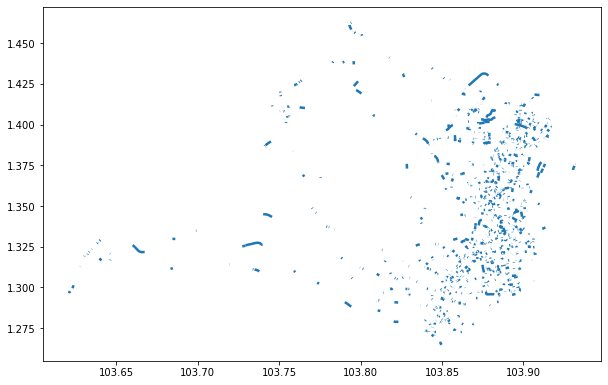

In [484]:
test_size = 1000

sample = np.random.randint(0, test_network.shape[0], size=test_size)
sample = np.unique(sample)
req_arcs = test_network.iloc[sample, :].copy()
req_arcs = req_arcs.sort_values(['arc_index'])
req_arcs = req_arcs.drop_duplicates(['arc_id_ordered'])
req_arcs = req_arcs.dropna(subset=['geometry'])
req_arcs['geometry'] = req_arcs['geometry'].apply(wkt.loads)
req_arcs = gpd.GeoDataFrame(req_arcs, geometry=req_arcs['geometry'], crs='EPSG:4326')

_ = req_arcs.plot(figsize=(10, 10), linewidth=2.5)

In [485]:
%%time
network_info = NetworkExtract(test_network, network_file)

depot = req_arcs['arc_index'].iloc[0]
ifs = req_arcs['arc_index'].iloc[-4:]

network_info.load_required_arcs(req_arcs)
network_info.set_depot_arc(depot)
network_info.set_if_arcs(ifs)
network_info.loc_in_required_arcs()
network_info.extend_required_inverse_arcs()
network_info.load_distance_matrix()

INFO:root:Creating inverse arc list
INFO:root:Number of edges: 19170
INFO:root:Edges with inverse pairs: 17799
INFO:root:Number of arcs: 17794
INFO:root:Load required arcs
INFO:root:Set depot
INFO:root:Set offload facilities
INFO:root:Extend required arcs with inverse edge arcs
INFO:root:Load distance matrix: 1380 x 1380
INFO:root:Creating nearest neighbour lists


CPU times: user 7.72 s, sys: 459 ms, total: 8.18 s
Wall time: 9.15 s


In [486]:
%%time
network_info.offload_calculations3D()

INFO:root:Calculate offloads: 1380 x 1380 x 4


CPU times: user 90.7 ms, sys: 38.4 ms, total: 129 ms
Wall time: 128 ms


In [487]:
%%time
demand = 1 # unit
df_demand = req_arcs[['arc_index']].copy()
df_demand['demand'] = 1

network_info.set_service_demand(df_demand)

network_info.set_travel_speed(30 / 3.6)
network_info.set_offload_time(15 * 60)
network_info.update_cost_matrix()
network_info.update_offload_cost()

service_costs = req_arcs[['arc_index', 'length']].copy()
service_costs['service_cost'] = service_costs[['length']] * 0/ service_speed
network_info.set_service_cost(service_costs)

network_info.d_np_req.mean()
network_info.if_cost_np.mean()

network_info.check_shapes()
network_info.round_key_inputs()

network_info.calc_min_duration_capacity()
network_info.min_duration
network_info.min_capacity

INFO:root:Setting demand for network
INFO:root:Update travel durations.
INFO:root:Update offload durations.
INFO:root:Setting service cost for network


AssertionError: 

In [488]:
network_info.d_np_req.mean()
network_info.if_cost_np.mean()
network_info.min_duration
network_info.min_capacity

1205.0173522369244

2843.910042722117

0

0